In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df=pd.read_csv(r'C:\Users\Farouk\Desktop\prediction\dataset_user_data(opinpos_event)500.csv')

In [3]:
missing_values_count= df.isnull().sum()
print (missing_values_count)

opinion_positive       0
event_participation    0
dtype: int64


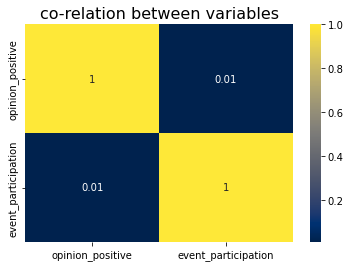

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),annot=True,cmap='cividis')
plt.title('co-relation between variables',fontsize=16)
plt.show()

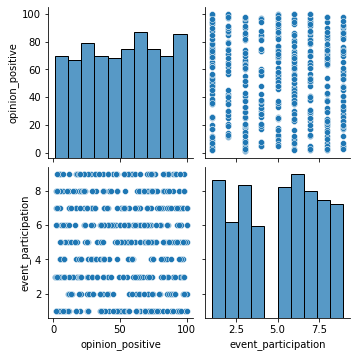

In [5]:
sns.pairplot(df)

Text(0.5, 1.0, 'joined events')

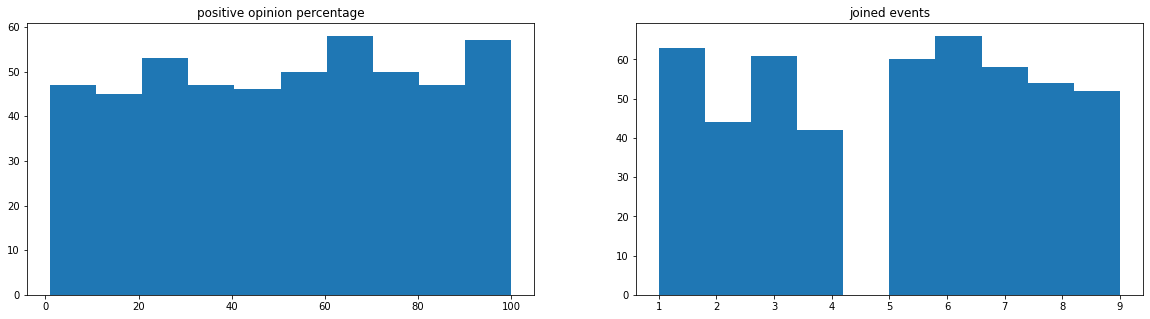

In [6]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize= (20,5))

#len_gender = len(df.Gender.unique())
#ax0.hist(df.Gender, bins=len_gender+1)
#ax0.set_title("Gender")

ax0.hist(df.opinion_positive)
ax0.set_title("positive opinion percentage")

ax1.hist(df.event_participation)
ax1.set_title("joined events")

In [7]:
X=df.iloc[:, :1]
y=df.iloc[:, 1]

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_y)

LogisticRegression(random_state=0)

In [8]:
y_pred = classifier.predict(val_X)
print(((y_pred,1), (val_y,1)),1)

((array([5, 6, 5, 3, 6, 6, 6, 6, 3, 5, 3, 6, 3, 6, 5, 3, 5, 3, 3, 6, 3, 3,
       5, 6, 5, 5, 6, 3, 3, 5, 6, 6, 5, 3, 5, 5, 6, 6, 6, 6, 6, 5, 3, 3,
       5, 6, 5, 6, 6, 3, 6, 5, 3, 5, 5, 3, 3, 5, 6, 6, 3, 5, 5, 5, 6, 6,
       5, 5, 6, 3, 6, 3, 6, 6, 5, 5, 3, 3, 5, 3, 6, 5, 6, 5, 3, 5, 6, 3,
       5, 6, 3, 6, 5, 6, 5, 3, 6, 5, 6, 3], dtype=int64), 1), (90     5
254    5
283    7
445    5
461    3
      ..
372    3
56     3
440    5
60     1
208    7
Name: event_participation, Length: 100, dtype: int64, 1)) 1


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(val_y, y_pred)
print(cm)
accuracy_score(val_y, y_pred)

[[0 0 5 0 5 7 0 0 0]
 [0 0 3 0 2 3 0 0 0]
 [0 0 6 0 3 5 0 0 0]
 [0 0 1 0 1 1 0 0 0]
 [0 0 4 0 8 5 0 0 0]
 [0 0 2 0 7 5 0 0 0]
 [0 0 4 0 3 6 0 0 0]
 [0 0 2 0 2 1 0 0 0]
 [0 0 2 0 3 4 0 0 0]]


0.19